In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable, Tuple
import math

In [2]:
def system1()->Tuple[Callable[[float,float],float],Callable[[float,float],float]]:
    fx = lambda x,y: y
    fy = lambda x,y: -x
    return fx,fy

def system2()->Tuple[Callable[[float,float],float],Callable[[float,float],float]]:
    fx = lambda x,y: y
    fy = lambda x,y: - math.sin(x)
    return fx,fy

def system3()->Tuple[Callable[[float,float],float],Callable[[float,float],float]]:
    fx = lambda x,y: y
    fy = lambda x, y: -x + x**3 if abs(x) < 1e10 else float('inf')  # Handle large values
    return fx,fy

def system4()->Tuple[Callable[[float,float],float],Callable[[float,float],float]]:
    fx = lambda x,y: y
    fy = lambda x,y: x - x**3 if abs(x) < 1e10 else float('inf')  # Handle large values
    return fx,fy

In [3]:
def midpoint_method(
    xn: float,
    yn: float,
    f: Callable[[],Tuple[Callable[[float,float],float],Callable[[float,float],float]]],
    dt: float,
) -> Tuple[float, float]:
    fx,fy = f()
    kx = dt * fx(xn, yn)
    ky = dt * fy(xn, yn)
    xnp1 = xn + dt * fx(xn + kx/2, yn + ky/2)
    ynp1 = yn + dt * fy(xn + kx/2, yn + ky/2)
    return xnp1, ynp1

In [4]:
systems = [system1, system2, system3, system4]
system_names = ["x''+x=0", "x''+sin(x)=0", "x''+x-x^3=0", "x''-x+x^3=0"]

In [5]:
def initial_conditions_f(rx, ry, n):
    return [(x, y) for x in np.linspace(-rx, rx, n) for y in np.linspace(-ry, ry, n)]

In [6]:
def calculate_isocline(f, slope, x_range):
    xs = np.linspace(*x_range, 500)
    ys = []
    for x in xs:
        try:
            fx, fy = f()
            y = slope * fx(x,1) / fy(x,1)
            ys.append(y)
        except ZeroDivisionError:
            ys.append(np.nan)
    return xs, ys

In [7]:
def make_phase_plot(initial_conditions, f, title, al, ah):
    for condition in initial_conditions:
        dt = 0.1
        t = 0
        x_axis = [float(condition[0])]
        y_axis = [float(condition[1])]
        times = [t]
        
        while t < 10:
            xnp1, ynp1 = midpoint_method(x_axis[-1], y_axis[-1], f, dt)
            x_axis.append(xnp1)
            y_axis.append(ynp1)
            t += dt
            times.append(t)
        # Plot the data points with gradient colors
        plt.plot(x_axis, y_axis, color='blue', linewidth=0.2)
        
        # Add arrows to indicate direction
        for j in range(0, len(x_axis) - 1, 100000):
            plt.arrow(x_axis[j], y_axis[j], x_axis[j+1] - x_axis[j], y_axis[j+1] - y_axis[j], 
                    fc='blue', ec='blue', head_width=al, head_length=al)
        
    # Plot the isoclines
    x_range = (initial_conditions[0][0], initial_conditions[-1][0])
    for slope in np.linspace(-10, 10, 10):
        xs, ys = calculate_isocline(f, slope, x_range)
        plt.plot(xs, ys, color='red', linewidth=0.5, linestyle='dashed')    

    # make horizontal line at y=0
    plt.axhline(0, color='red', linewidth=0.5, linestyle='dashed')


    plt.title(f"System: {title}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(initial_conditions[0][0], initial_conditions[-1][0])
    plt.ylim(initial_conditions[0][1], initial_conditions[-1][1])
    plt.grid(True)
    plt.show()

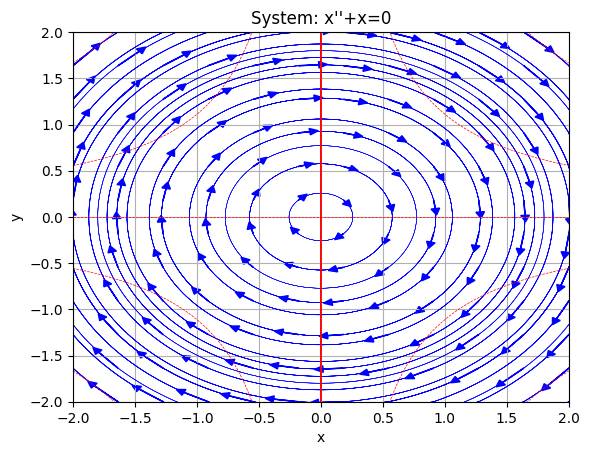

In [8]:
ic = initial_conditions_f(2, 2, 12)
make_phase_plot(ic, systems[0], system_names[0], 0.07, 0.07)

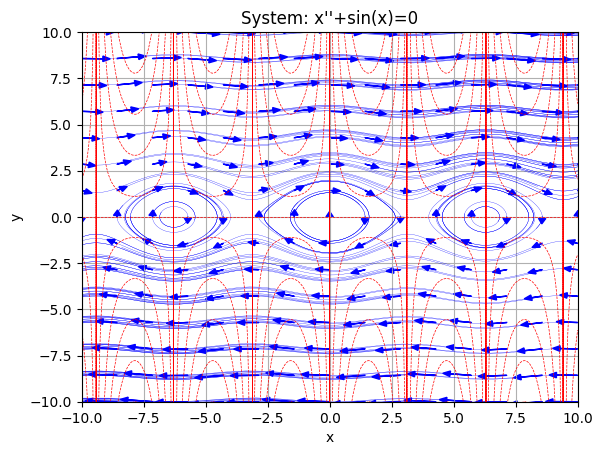

In [9]:
ic = initial_conditions_f(10, 10, 15)
make_phase_plot(ic, systems[1], system_names[1], 0.3, 0.3)

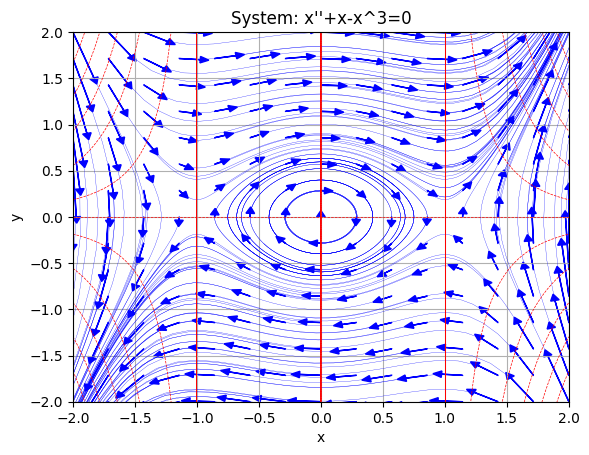

In [10]:
ic = initial_conditions_f(2, 2, 15)
make_phase_plot(ic, systems[2], system_names[2], 0.07, 0.07)

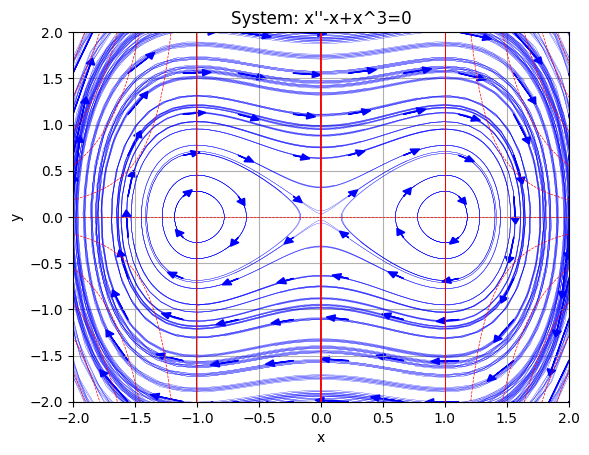

In [11]:
ic = initial_conditions_f(2, 2, 10)
make_phase_plot(ic, systems[3], system_names[3], 0.07, 0.07)